In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn import metrics
from bioinfokit.visuz import cluster

In [2]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
path = "/Users/sunny/Desktop/Ass 2.0/PDA/data/original data/cleaned_movie_data_with_movie_title_signle_multipleGenre.csv"
df = pd.read_csv(path)
df = df.drop(["Unnamed: 0"],axis = 1)


In [6]:
df.head(3)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_single,movie_category
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Fantasy,hit
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Fantasy,hit
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Adventure,hit


# segregating X and Y

X contains independent columns and y contains what needs to be predicted. 
we are trying to predict genres so y will contain genre and x will contain columns other than genre.

In [7]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'genres_single',
       'movie_category'],
      dtype='object')

In [8]:
# dropping plot key words as it is long string 
# dropping genre as well 
x = df.drop(["genres","plot_keywords","movie_title","genres_single"], axis=1)
y = df["genres_single"]

### computer and algorithms understands only the language of numbers, so we will have to convert all the category and string columns in to number .LabelEncoder() will be used to encode the column and moving forward.

In [9]:
x.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'movie_category'],
      dtype='object')

In [10]:
# creating the list of columns which needs to be converted in to numerical form

cat_list=['director_name', 'actor_2_name',
         'actor_1_name',
        'actor_3_name',
        'language', 'country', 'content_rating',
       'title_year',"movie_category"]
encoder = LabelEncoder()

x[cat_list]=x[cat_list].apply(lambda x:encoder.fit_transform(x))

In [11]:
x.head(3)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,movie_category
0,620,723.0,178.0,0.0,855.0,1002,1000.0,760505847.0,189,886204,4834,2529,0.0,3054.0,9,43,7,237000000.0,66,936.0,7.9,1.78,33000,3
1,538,302.0,169.0,563.0,1000.0,1592,40000.0,309404152.0,687,471220,48350,1001,0.0,1238.0,9,43,7,300000000.0,64,5000.0,7.1,2.35,0,3
2,1395,602.0,148.0,0.0,161.0,1795,11000.0,200074175.0,258,275868,11700,2296,1.0,994.0,9,42,7,245000000.0,72,393.0,6.8,2.35,85000,3


# correlation

correlation is very important to understand how columns are interrelated to each other. if tweo columns are more than 90% correlated , it makes sense to remove one.

<AxesSubplot:>

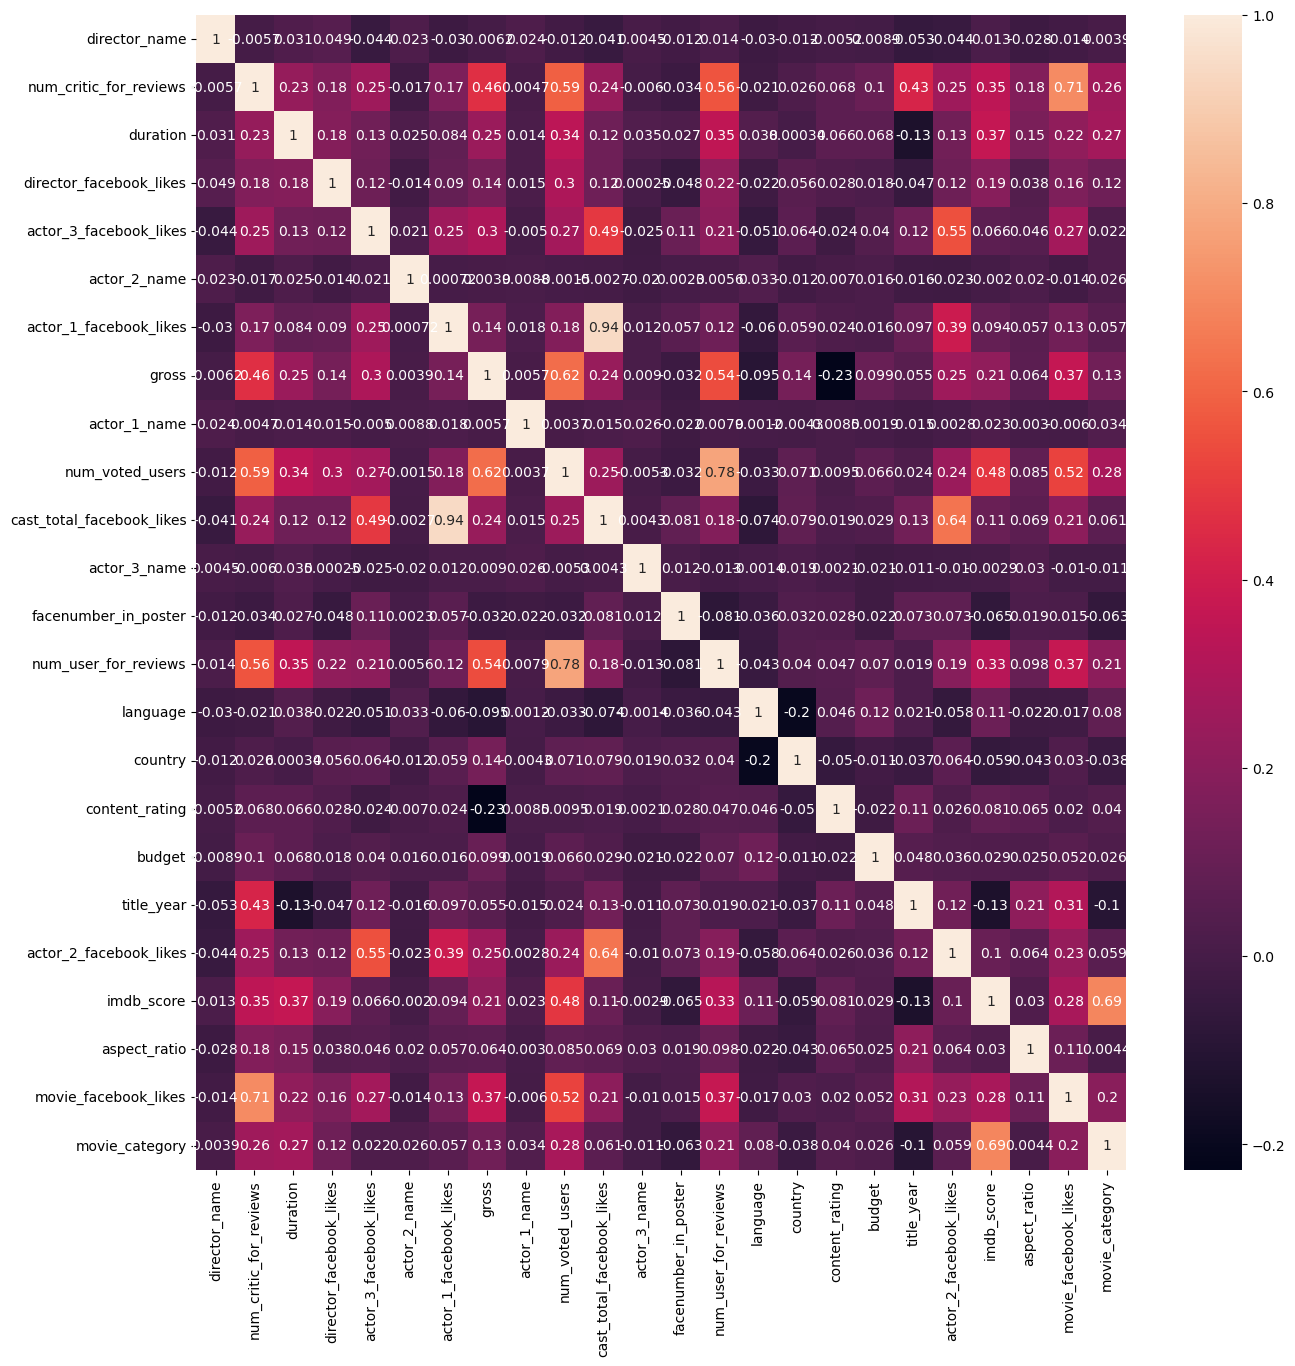

In [12]:
rcParams['figure.figsize'] = 15, 15
sns.heatmap(x.corr(),annot=True)

In [13]:
#putting a threshold of 90% to remove heavily correlated columns
upper_tri = x.corr().where(np.triu(np.ones(x.corr().shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print();
print(to_drop)


['cast_total_facebook_likes']


/var/folders/4d/xvgb125s4755t_fztc66hflm0000gn/T/ipykernel_10262/2338102803.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = x.corr().where(np.triu(np.ones(x.corr().shape),k=1).astype(np.bool))


In [14]:
# dropping higly correlated column
x = x.drop(['cast_total_facebook_likes'] , axis = 1)

# -------------------PCA----------------------

### pca is done to reduce the dimension in a dataframe.

scaling of data is needed before mvoing forward in PCA process.

In [25]:
# scaling before doing PCA
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(x)

In [26]:
pca = PCA().fit(data_rescaled)

In [27]:
x.shape

(3756, 23)

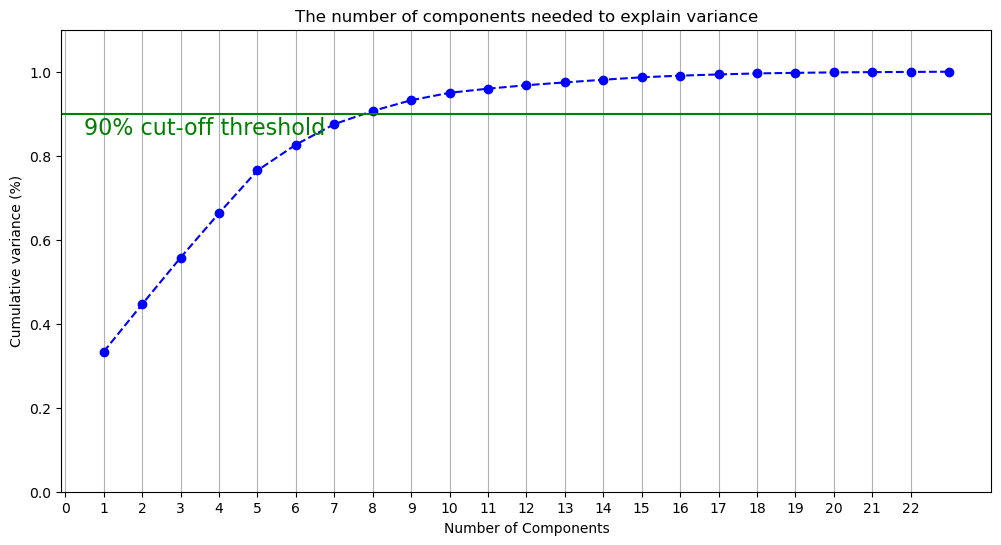

In [28]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 24, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 23, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.9, color='g', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'green', fontsize=16)

ax.grid(axis='x')
plt.show()

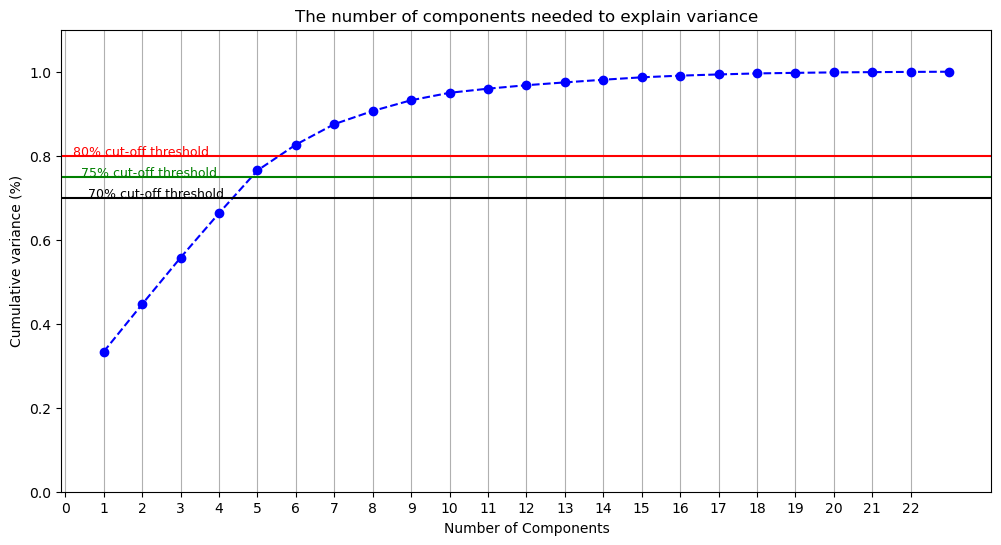

In [29]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 24, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 23, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.2, 0.8, '80% cut-off threshold', color = 'red', fontsize=9)
plt.axhline(y=0.75, color='g', linestyle='-')
plt.text(0.4, 0.75, '75% cut-off threshold', color = 'green', fontsize=9)

plt.axhline(y=0.7, color='black', linestyle='-')
plt.text(0.6, 0.7, '70% cut-off threshold', color = 'black', fontsize=9)

ax.grid(axis='x')
plt.show()

In [30]:
# variance ratio explained by each component
pca.explained_variance_ratio_

array([0.33327712, 0.11301476, 0.1109151 , 0.10581256, 0.10182624,
       0.06147307, 0.04882591, 0.03139048, 0.02555548, 0.01770169,
       0.00985625, 0.00823568, 0.00668818, 0.00637061, 0.0057426 ,
       0.00398047, 0.00285591, 0.00242136, 0.00140088, 0.00102874,
       0.00065991, 0.00054416, 0.00042285])

In [44]:
pca = PCA(0.9).fit(data_rescaled)

In [54]:
pca_out = pca
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
variable,,,,,,,,
director_name,0.004931,-0.739235,-0.283246,-0.573092,-0.205607,-0.015322,0.012257,-0.013579
num_critic_for_reviews,0.090957,0.023295,-0.002767,-0.011795,-0.000625,-0.157653,0.663212,0.016756
duration,0.045088,-0.007265,-0.009545,0.002333,-0.007747,-0.027819,0.088737,0.028584
director_facebook_likes,0.038284,-0.012074,-0.016297,-0.022816,-0.000923,-0.099291,0.187840,0.080379
actor_3_facebook_likes,0.006481,0.008391,0.012233,0.007332,0.003431,-0.062172,0.139952,0.053801
actor_2_name,0.020850,-0.618624,0.434094,0.636753,-0.146702,-0.024451,0.021856,0.003048
actor_1_facebook_likes,0.003253,0.002136,-0.000701,0.002162,0.001192,-0.012138,0.022594,0.000751
gross,0.029413,0.006183,-0.003567,0.001345,-0.002398,-0.133256,0.233937,0.237328
actor_1_name,0.027679,-0.255943,-0.371451,0.203279,0.868463,-0.007539,0.005668,0.003237


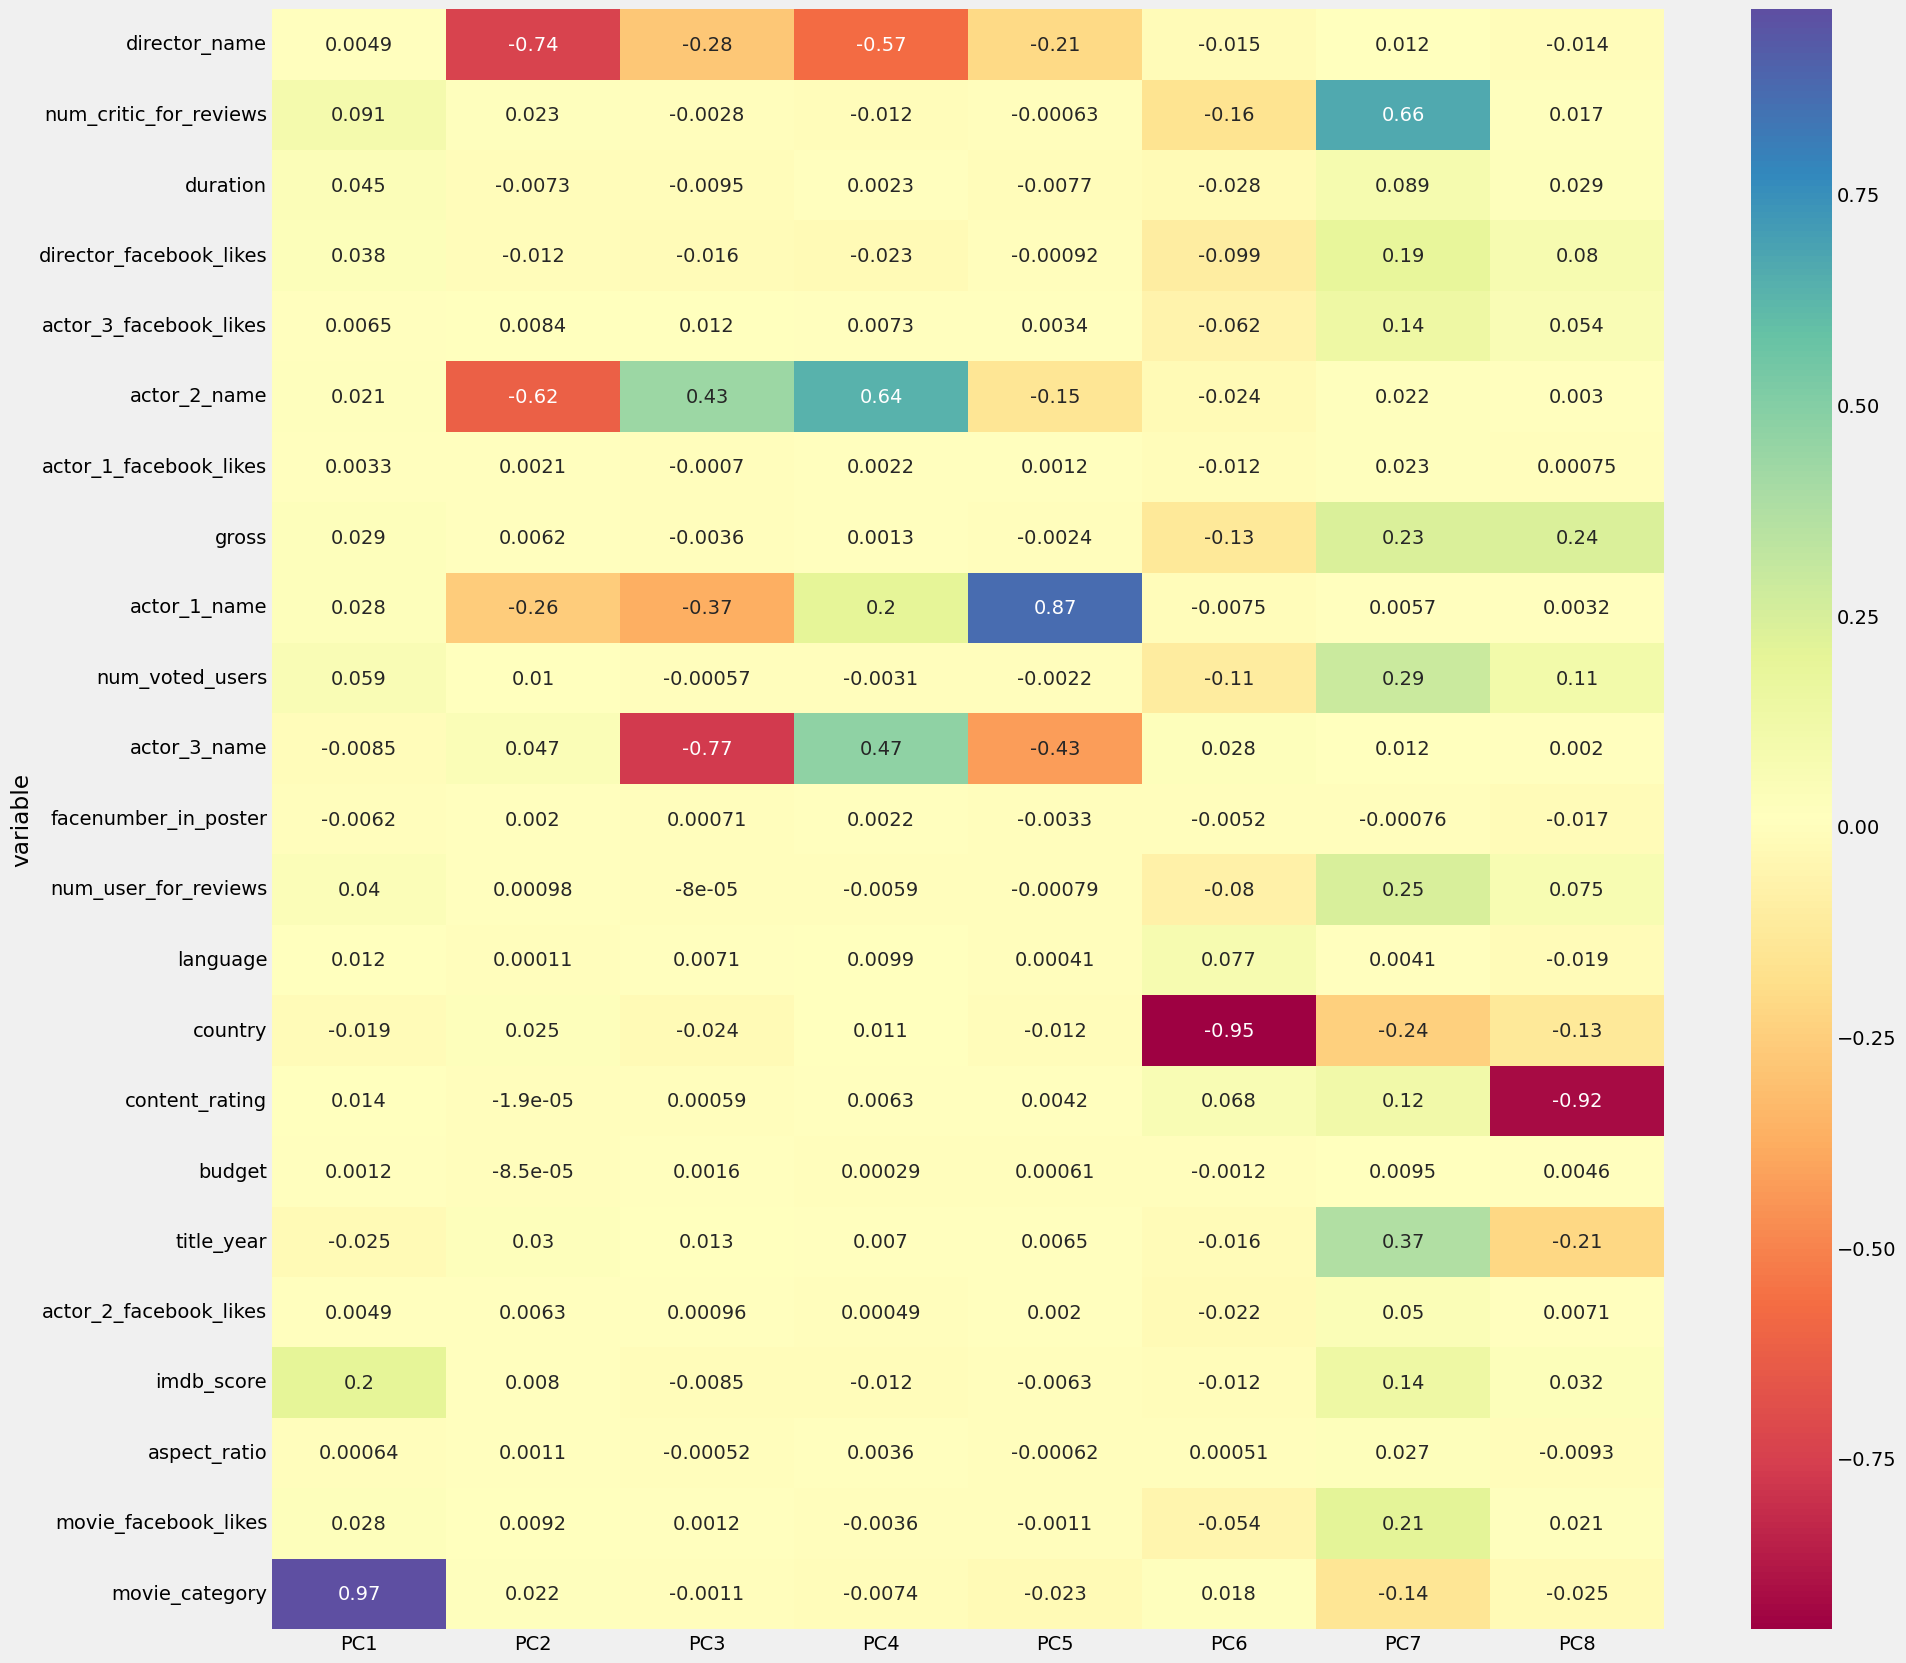

In [60]:
rcParams['figure.figsize'] = 20, 20
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [40]:
x.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'num_voted_users',
       'actor_3_name', 'facenumber_in_poster', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'movie_category'],
      dtype='object')

# important columns based on PCA loading
### """movie_category,director_name,actor_3_name,actor_2_name,actor_1_name,country,num_critic_for_reviews,content_rating"""

# ------- Clustering---------------

In [47]:
pca = PCA(0.90)

df_pca = pca.fit_transform(data_rescaled)

In [48]:
kmeans = KMeans(
    
       init="random",
       n_clusters=3,
       n_init=10,
       max_iter=300,
       random_state=42
   )


In [49]:
kmeans.fit(df_pca)

KMeans(init='random', n_clusters=3, random_state=42)

In [50]:
In [13]: kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 300,
   ...:     "random_state": 42,
   ...: }
   ...:
   ...: # A list holds the SSE values for each k
   ...: sse = []
   ...: for k in range(1, 30):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(df_pca)
   ...:     sse.append(kmeans.inertia_)

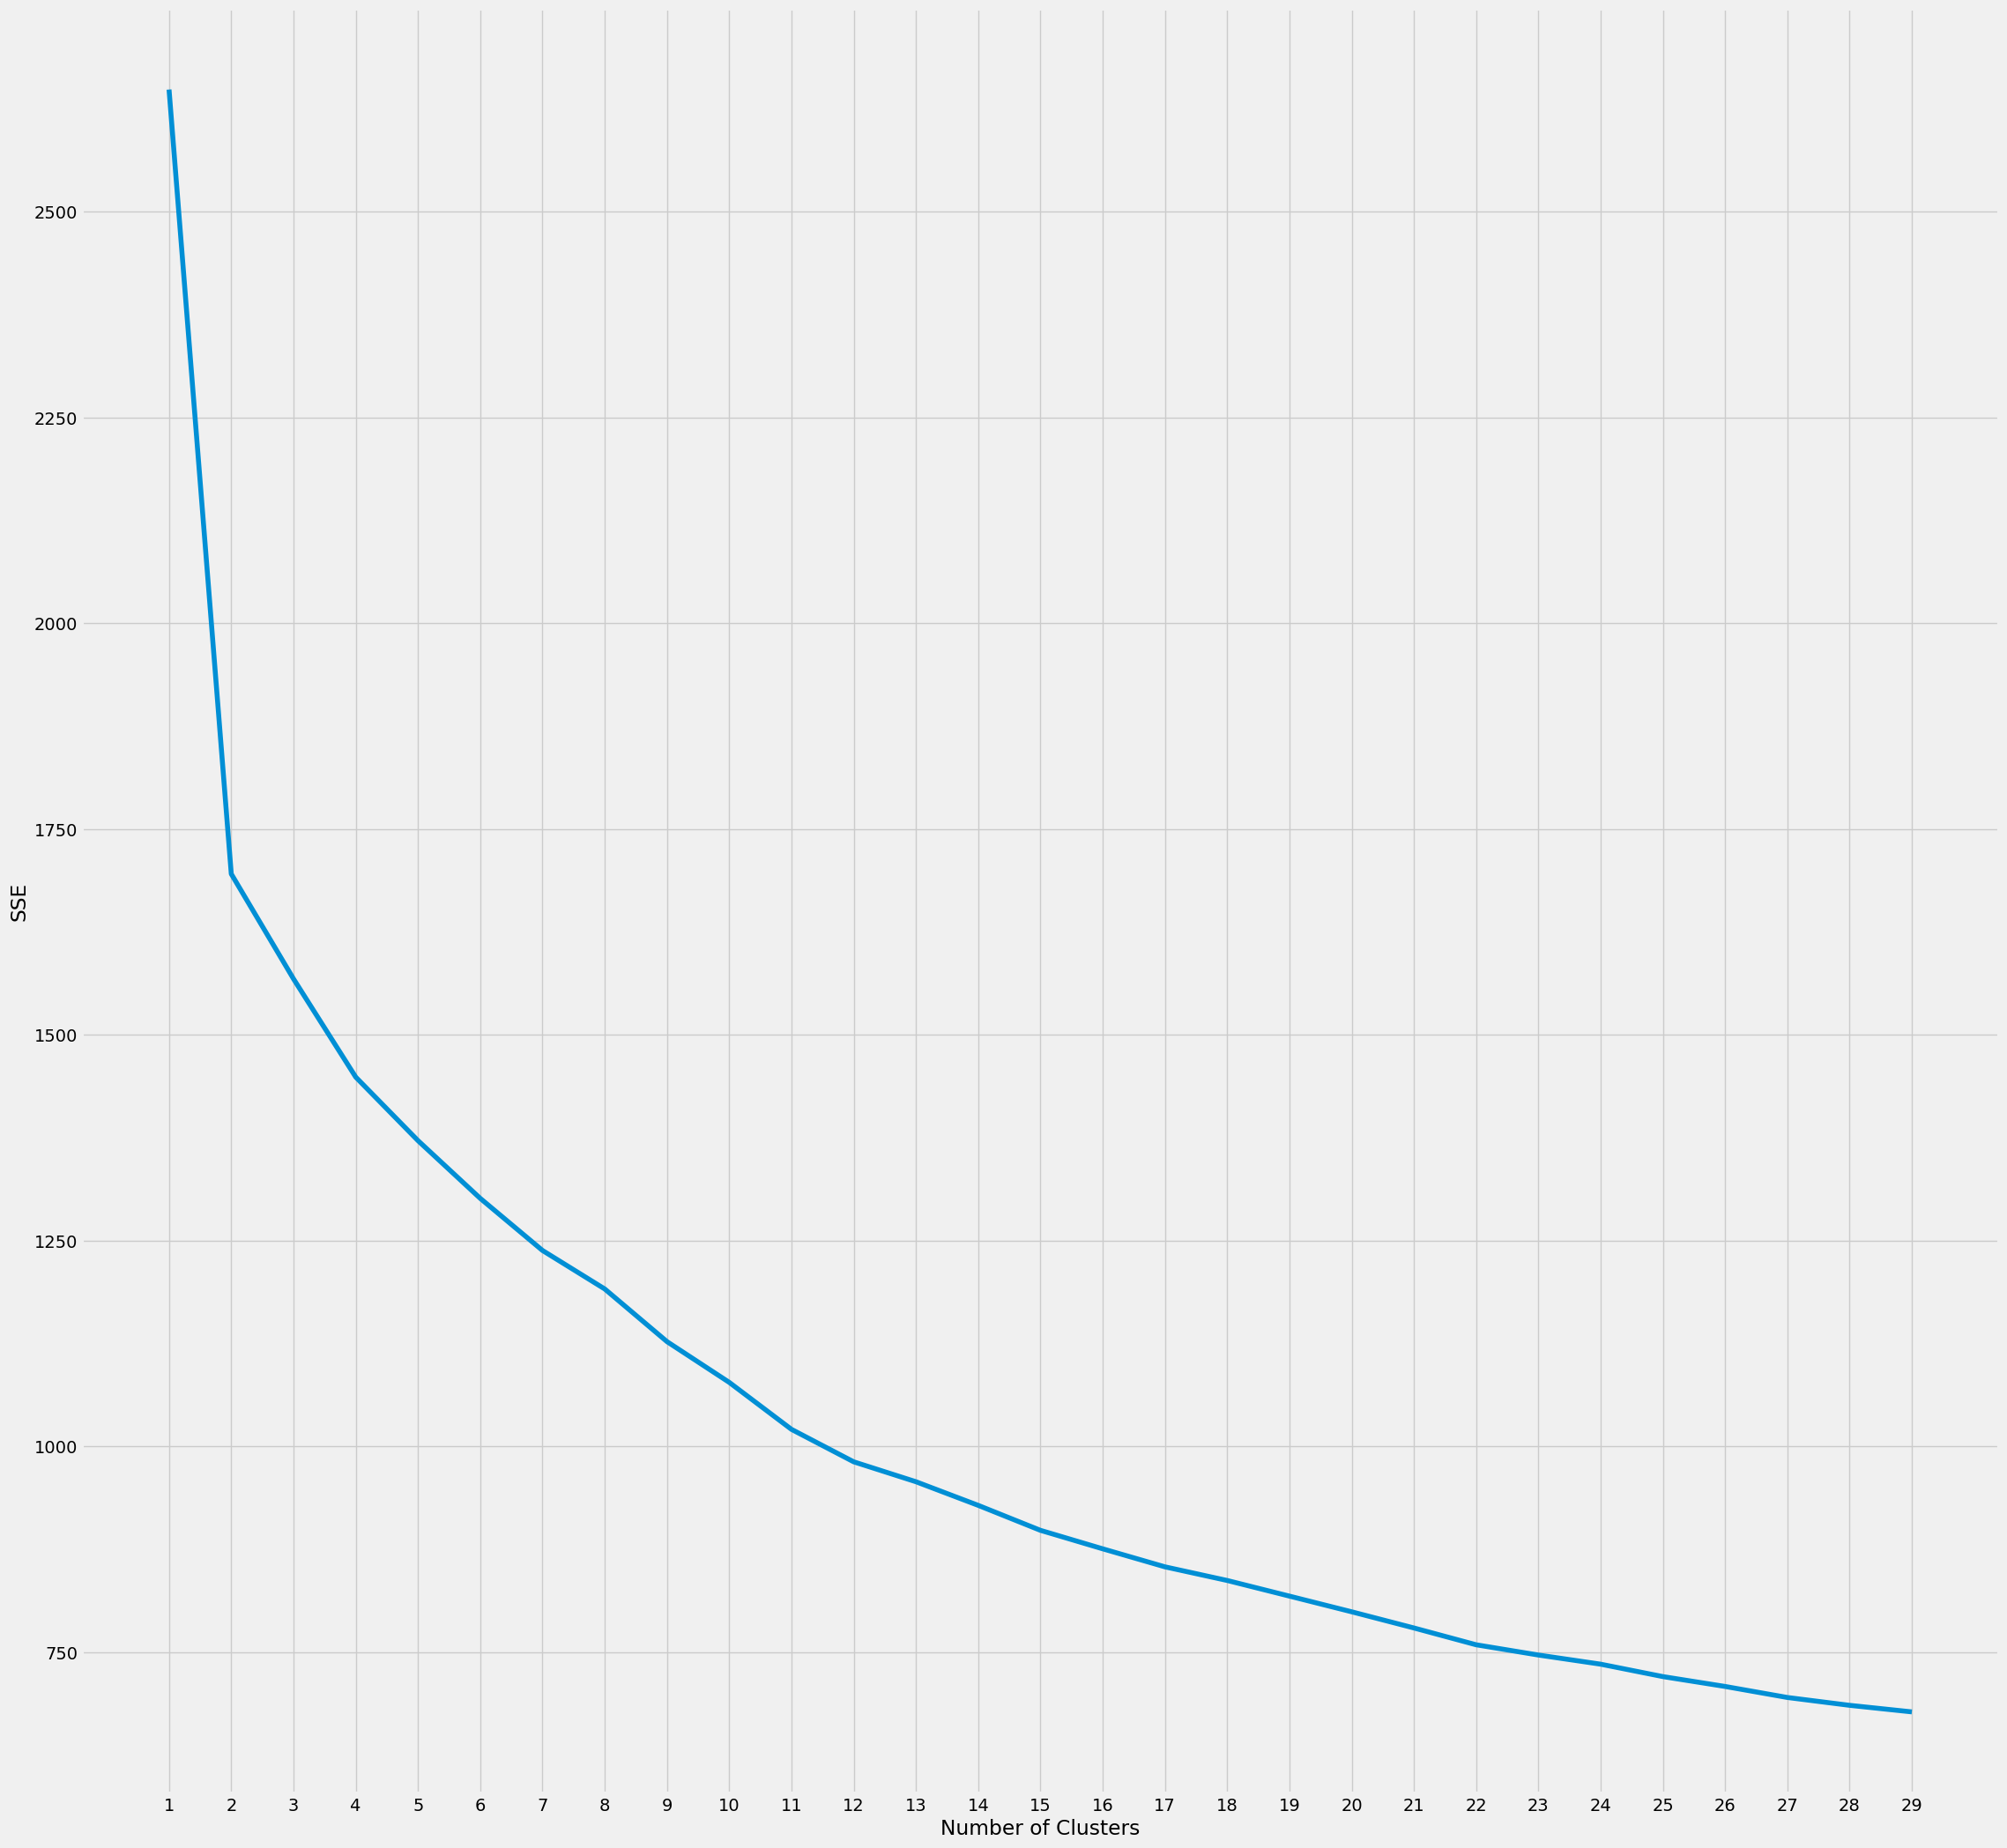

In [51]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 30), sse)
plt.xticks(range(1, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [64]:
# create a K means cluster  with k=3
k_movies = KMeans(
    
       init="random",
       n_clusters=3,
       n_init=10,
       max_iter=300,
       random_state=42
   )


# predicting
predicted_cluster = k_movies.fit_predict(data_rescaled)


In [67]:
# assigning clusters to dataframe
sample_df_clusters = x
sample_df_clusters["clusters"] = predicted_cluster
sample_df_clusters.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,movie_category,clusters
0,620,723.0,178.0,0.0,855.0,1002,1000.0,760505847.0,189,886204,2529,0.0,3054.0,9,43,7,237000000.0,66,936.0,7.9,1.78,33000,3,0
1,538,302.0,169.0,563.0,1000.0,1592,40000.0,309404152.0,687,471220,1001,0.0,1238.0,9,43,7,300000000.0,64,5000.0,7.1,2.35,0,3,0
2,1395,602.0,148.0,0.0,161.0,1795,11000.0,200074175.0,258,275868,2296,1.0,994.0,9,42,7,245000000.0,72,393.0,6.8,2.35,85000,3,2
3,251,813.0,164.0,22000.0,23000.0,381,27000.0,448130642.0,1340,1144337,1267,0.0,2701.0,9,43,7,250000000.0,69,23000.0,8.5,2.35,164000,3,0
4,62,462.0,132.0,475.0,530.0,1837,640.0,73058679.0,323,212204,1967,1.0,738.0,9,43,7,263700000.0,69,632.0,6.6,2.35,24000,3,0


### counting how many elements in which cluster

In [68]:
sample_df_clusters.groupby('clusters')['clusters'].count()   

clusters
0     950
1    1816
2     990
Name: clusters, dtype: int64

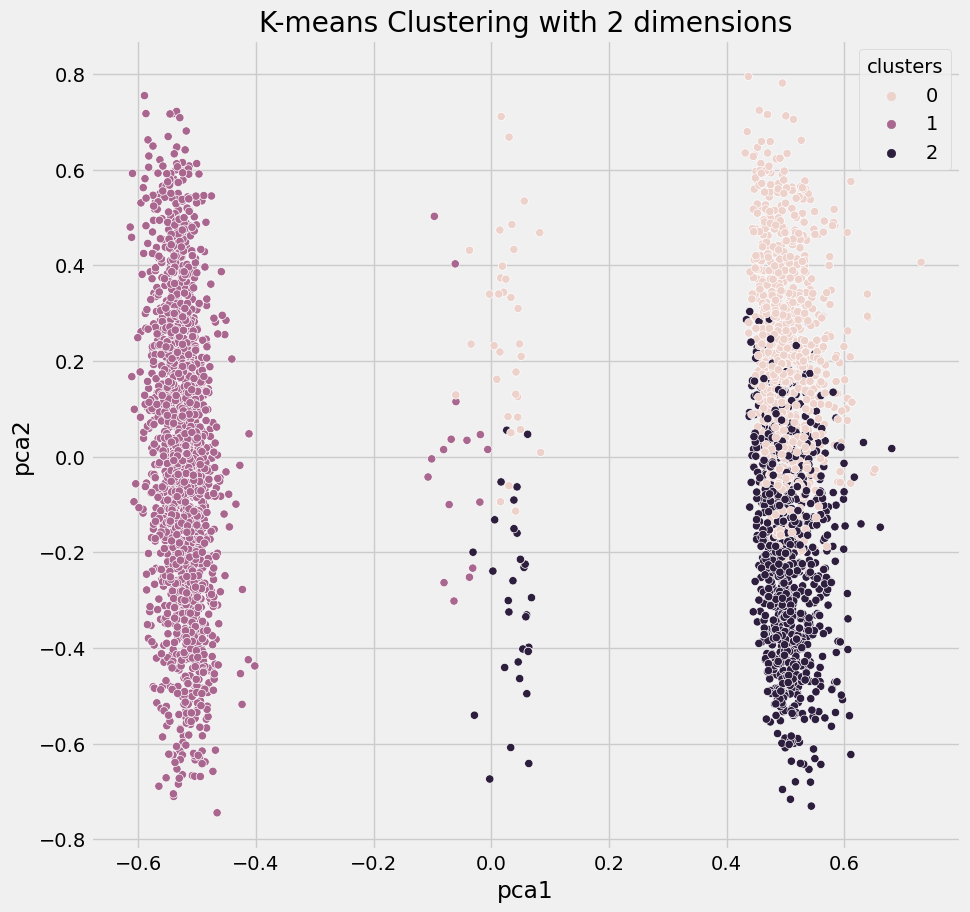

In [79]:
### clusters in graph

pca_data = PCA(n_components=2).fit_transform(data_rescaled)
pca_comp_df = pd.DataFrame(pca_data,columns=['pca1','pca2'])


rcParams['figure.figsize'] = 10, 10
sns.scatterplot(x="pca1", y="pca2", hue=sample_df_clusters['clusters'], data=pca_comp_df)
plt.title('K-means Clustering with 2 dimensions')
plt.show()